<a href="https://colab.research.google.com/github/laugustovieira/Soro_Anti_Escorpionico/blob/main/noteboocks/soro_anti_escorpionico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar Bibliotecas necessárias para análise


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Carregando arquivos para análise

In [ ]:
dados_regiao = pd.read_csv("https://raw.githubusercontent.com/laugustovieira/Soro_Anti_Escorpionico/main/Dados/SoroAntiEscorpi%C3%B4nicoRegi%C3%B5es.csv",
                           encoding="ISO-8859-1", sep=";", skipfooter=1, engine ="python", thousands= ".", decimal=",")


#Tratar dados

In [ ]:
colunas_usaveis = dados_regiao.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")

dados_regiao_usaveis_max = dados_regiao[colunas_usaveis]
dados_regiao_usaveis_max = dados_regiao_usaveis_max.nlargest(27," Total")
dados_regiao_usaveis_max = dados_regiao_usaveis_max.drop([" Total","2001","2002","2003"], axis=1)
dados_regiao_usaveis_max = dados_regiao_usaveis_max.set_index("Unidade da Federação")

dados_regiao_usaveis_min = dados_regiao[colunas_usaveis]
dados_regiao_usaveis_min = dados_regiao_usaveis_min.nsmallest(27," Total")
dados_regiao_usaveis_min =dados_regiao_usaveis_min.drop([" Total","2001","2002","2003"], axis=1)
dados_regiao_usaveis_min = dados_regiao_usaveis_min.set_index("Unidade da Federação")

colunas_usaveis.remove(" Total")
colunas_usaveis.remove("2001")
colunas_usaveis.remove("2002")
colunas_usaveis.remove("2003")

dados_regiao_usaveis = dados_regiao[colunas_usaveis]
dados_regiao_usaveis = dados_regiao_usaveis.set_index("Unidade da Federação")
dados_regiao_usaveis.head()

,2004/Jan,2004/Fev,2004/Mar,2004/Abr,2004/Mai,2004/Jun,2004/Jul,2004/Ago,2004/Set,2004/Out,2004/Nov,2004/Dez,2005/Jan,2005/Fev,2005/Mar,2005/Abr,2005/Mai,2005/Jun,2005/Jul,2005/Ago,2005/Set,2005/Out,2005/Nov,2005/Dez,2006/Jan,2006/Fev,2006/Mar,2006/Abr,2006/Mai,2006/Jun,2006/Jul,2006/Ago,2006/Set,2006/Out,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,0,5,3,1,0,7,8,4,5,2,7,7,8,0,4,4,5,4,7,2,4,4,6,1,6,11,0,7,10,1,10,9,15,7,11,4,8,8,8,8,...,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,5,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12 Acre,0,0,0,0,0,0,1,0,0,0,1,2,0,0,1,1,1,2,10,0,2,0,0,7,2,0,0,0,0,10,0,1,0,11,1,2,1,6,4,1,...,5,1,0,2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,3,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0
13 Amazonas,0,0,0,0,3,5,2,4,4,0,3,3,9,3,9,4,19,7,3,2,8,4,6,1,25,18,23,42,9,21,25,21,3,8,6,7,22,46,25,19,...,6,0,0,0,2,0,0,0,0,6,2,0,0,0,3,2,0,0,2,0,6,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0
14 Roraima,0,10,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,0,4,1,0,5,2,1,0,0,0,2,0,4,0,0,3,0,5,0,0,0,0,...,12,0,0,5,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15 Pará,82,62,100,95,153,58,89,78,107,78,143,86,113,106,97,110,102,112,88,100,153,98,97,91,86,120,86,100,61,51,96,99,89,98,73,60,140,100,154,160,...,15,1,6,6,12,6,7,10,2,4,0,11,12,9,17,11,9,4,13,11,9,2,9,0,9,15,8,3,20,14,24,11,13,11,5,2,1,0,5,0


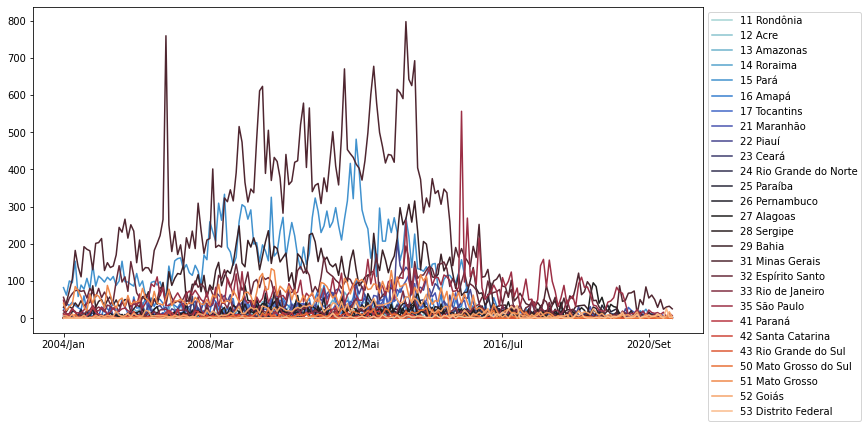

In [ ]:
ax =dados_regiao_usaveis.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1,1)) 
sns.set_palette(sns.color_palette("icefire", 27))

(0.0, 800.0)

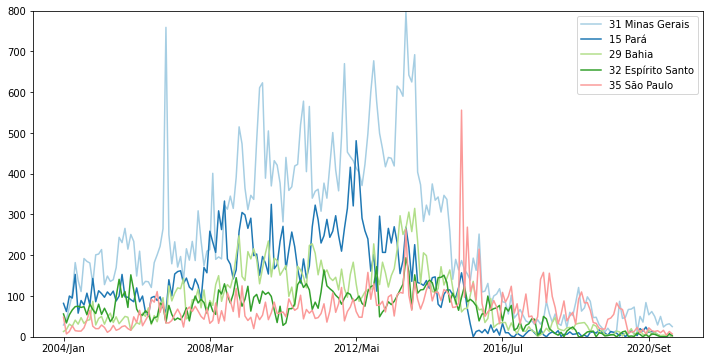

In [ ]:
cinco_primeiros = dados_regiao_usaveis_max.index.to_list()[0:5]
dados_regiao_cinco_primeiros = dados_regiao_usaveis_max.loc[cinco_primeiros]
dados_regiao_cinco_primeiros.T.plot(figsize=(12,6))
ax=plt.legend(bbox_to_anchor=(1,1)) 
sns.set_palette(sns.color_palette("Paired", 27))
plt.ylim(0,800)

(0.0, 800.0)

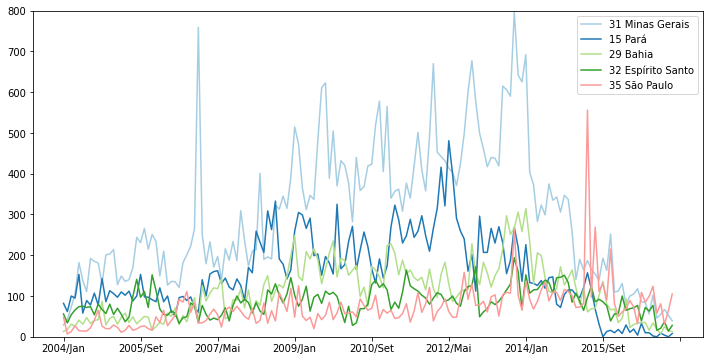

In [ ]:
dados_regiao_cinco_primeiros_cortado = dados_regiao_cinco_primeiros[dados_regiao_cinco_primeiros.columns[-300:-50]]
ax = dados_regiao_cinco_primeiros_cortado.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1,1)) 
sns.set_palette(sns.color_palette("Paired", 27))
plt.ylim(0,800)

(0.0, 800.0)

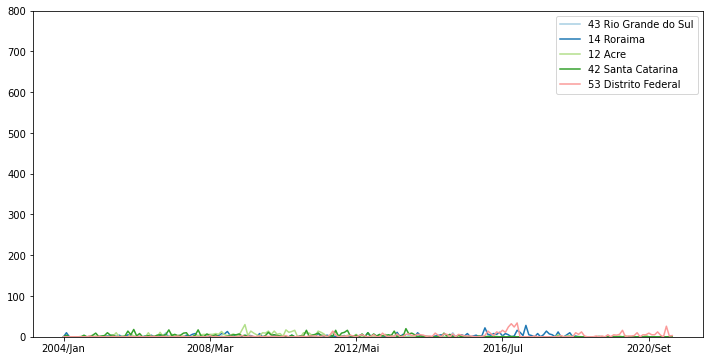

In [ ]:
cinco_primeiros = dados_regiao_usaveis_min.index.to_list()[0:5]
dados_regiao_cinco_primeiros = dados_regiao_usaveis_max.loc[cinco_primeiros]
dados_regiao_cinco_primeiros.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1,1)) 
sns.set_palette(sns.color_palette("Paired", 27))
plt.ylim(0,800)

(0.0, 40.0)

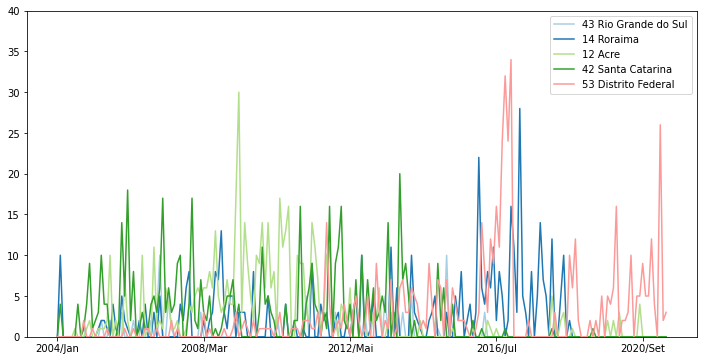

In [ ]:
dados_regiao_cinco_primeiros.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1,1)) 
sns.set_palette(sns.color_palette("Paired", 27))
plt.ylim(0,40)